# Load

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e7_path = kagglehub.competition_download('playground-series-s5e7')

print('Data source import complete.')


100%|██████████| 191k/191k [00:00<00:00, 59.7MB/s]

Extracting files...
Data source import complete.


In [ ]:
playground_series_s5e7_path

'/root/.cache/kagglehub/competitions/playground-series-s5e7'

In [ ]:
import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/competitions/playground-series-s5e7'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/root/.cache/kagglehub/competitions/playground-series-s5e7/train.csv
/root/.cache/kagglehub/competitions/playground-series-s5e7/sample_submission.csv
/root/.cache/kagglehub/competitions/playground-series-s5e7/test.csv


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [ ]:
data=pd.read_csv('/root/.cache/kagglehub/competitions/playground-series-s5e7/train.csv')
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


datatypes are correct

In [ ]:
df=data.copy()

Null values in all columns except ID and personality

# Drop cols

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
def stat(d):
  print(d.shape)
  return d.head()
stat(df)

(18524, 8)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


# Uni&Bi

In [ ]:
plt.rcParams['figure.figsize']=[20,10]

In [ ]:
num =df.select_dtypes(include=np.number).columns.to_list()
cat=df.select_dtypes(exclude=np.number).columns.to_list()
len(num),len(cat)

(5, 3)

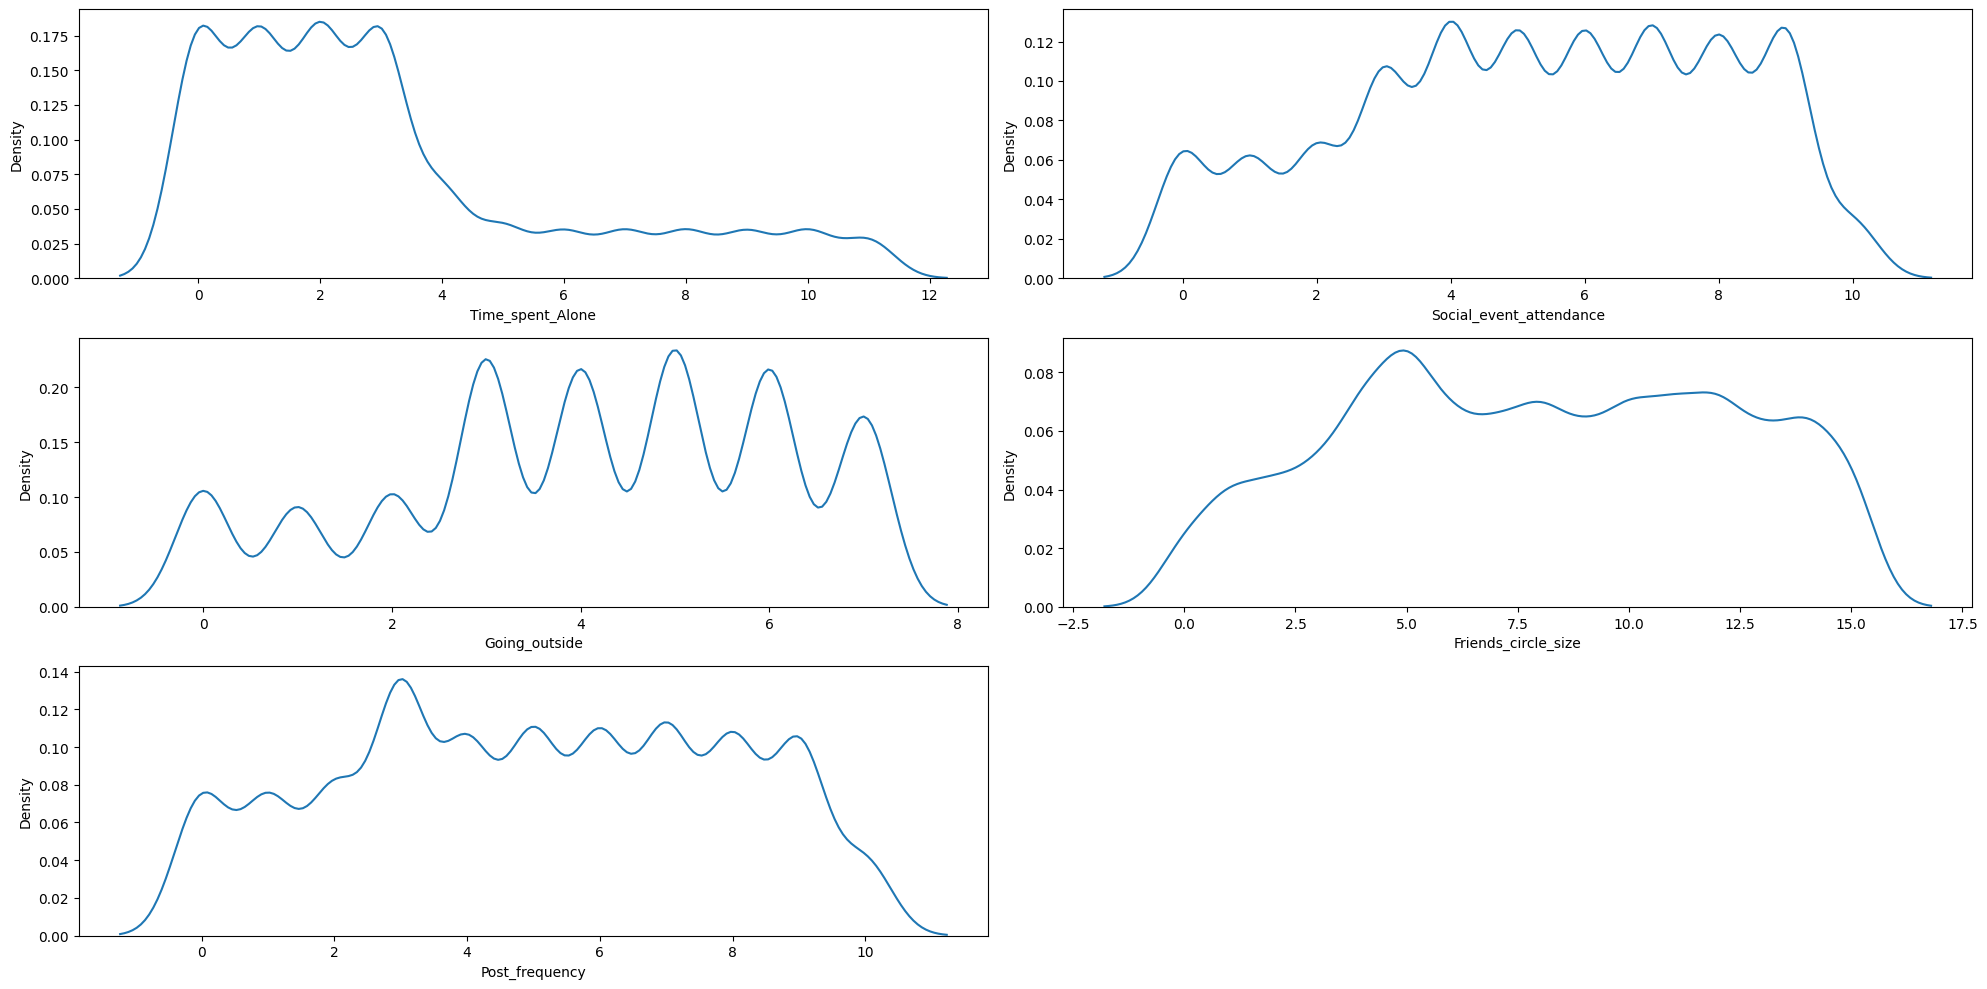

In [ ]:
t=1
for i in num:
    plt.subplot(3,2,t)
    sns.kdeplot(df[i])
    # plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

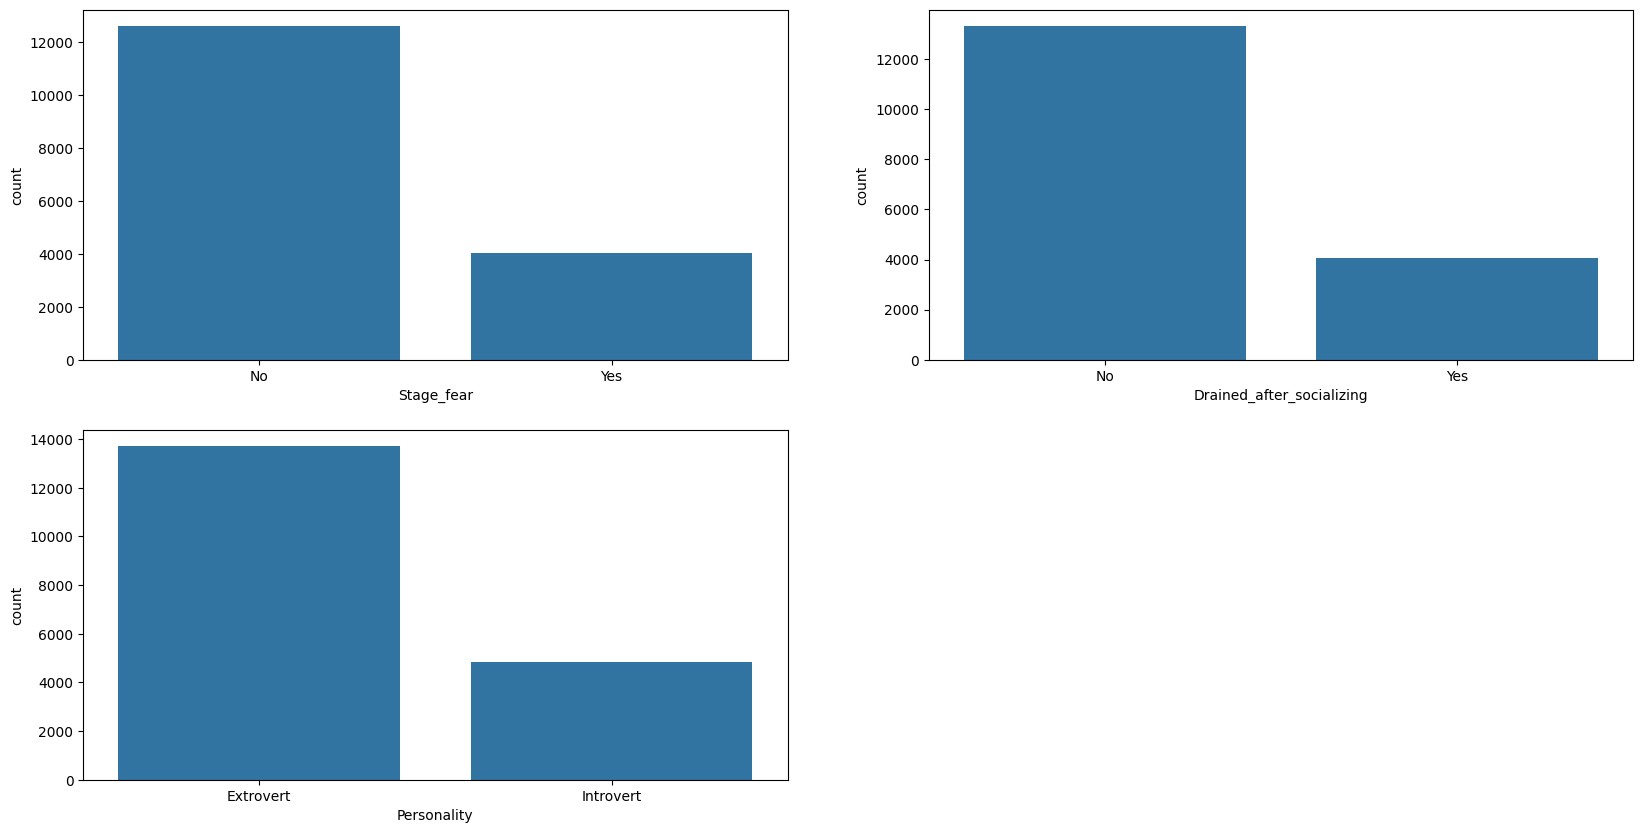

In [ ]:
t=1
for i in cat:
  plt.subplot(2,2,t)
  sns.countplot(x=df[i])
  t+=1

Imbalanced target variable (intro/extro)

# Null value removal

In [ ]:
(df.isnull().sum()/len(df))*100

,0
Time_spent_Alone,6.424098
Stage_fear,10.219175
Social_event_attendance,6.370114
Going_outside,7.914057
Drained_after_socializing,6.202764
Friends_circle_size,5.689916
Post_frequency,6.823580
Personality,0.000000


<Axes: >

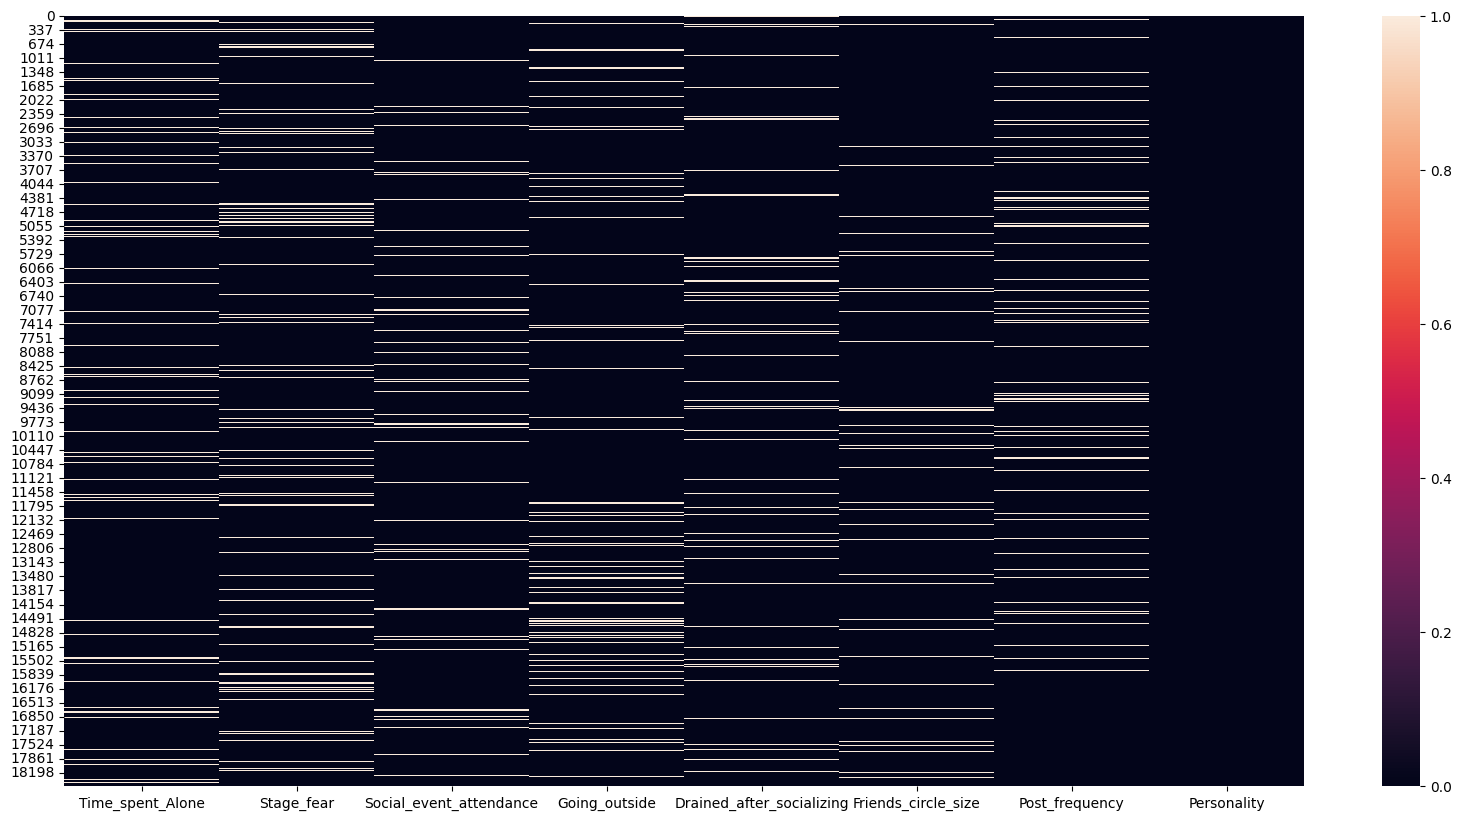

In [ ]:
mapp = df.isnull()
sns.heatmap(mapp)

In [ ]:
df[df['Stage_fear'].isnull()]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
13,3.0,NaN,NaN,5.0,No,12.0,5.0,Extrovert
17,5.0,NaN,0.0,4.0,Yes,2.0,0.0,Introvert
22,4.0,NaN,0.0,1.0,Yes,2.0,0.0,Introvert
26,3.0,NaN,6.0,5.0,No,10.0,9.0,Extrovert
27,9.0,NaN,0.0,0.0,Yes,1.0,1.0,Introvert
...,...,...,...,...,...,...,...,...
18498,3.0,NaN,5.0,5.0,No,15.0,7.0,Extrovert
18504,2.0,NaN,8.0,5.0,No,11.0,3.0,Extrovert
18507,3.0,NaN,6.0,6.0,No,14.0,5.0,Extrovert
18518,3.0,NaN,8.0,3.0,No,5.0,8.0,Extrovert


In [ ]:
df['Time_spent_Alone'].median()

2.0

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5,missing_values=np.nan)
temp = pd.DataFrame(knn.fit_transform(df[num]),columns=num)
df = pd.concat([df[cat],temp],axis=1)
stat(df)


(18524, 8)


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,Extrovert,0.0,6.0,4.0,15.0,5.0
1,No,No,Extrovert,1.0,7.0,3.0,10.0,8.0
2,Yes,NaN,Introvert,6.0,1.0,0.0,3.0,0.0
3,No,No,Extrovert,3.0,7.0,3.0,11.0,5.0
4,No,No,Extrovert,1.0,4.0,4.0,13.0,6.4


In [ ]:
df.isnull().sum()

,0
Stage_fear,1893
Drained_after_socializing,1149
Personality,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0


In [ ]:
# df[df['Drained_after_socializing'].isnull()]['Social_event_attendance'].mean()
# df['Drained_after_socializing'].mode()

In [ ]:
df['Stage_fear']= df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Drained_after_socializing']= df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Stage_fear,0
Drained_after_socializing,0
Personality,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0


## Checkpoint 1: Null values removed

In [ ]:
temp_nonull = df.copy()

In [ ]:
stat(df)


(18524, 8)


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,Extrovert,0.0,6.0,4.0,15.0,5.0
1,No,No,Extrovert,1.0,7.0,3.0,10.0,8.0
2,Yes,No,Introvert,6.0,1.0,0.0,3.0,0.0
3,No,No,Extrovert,3.0,7.0,3.0,11.0,5.0
4,No,No,Extrovert,1.0,4.0,4.0,13.0,6.4


# Outlier & Skewness, Stats

In [ ]:
stat(df)

(18524, 8)


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,Extrovert,0.0,6.0,4.0,15.0,5.0
1,No,No,Extrovert,1.0,7.0,3.0,10.0,8.0
2,Yes,No,Introvert,6.0,1.0,0.0,3.0,0.0
3,No,No,Extrovert,3.0,7.0,3.0,11.0,5.0
4,No,No,Extrovert,1.0,4.0,4.0,13.0,6.4


In [ ]:
df[num].skew()

,0
Time_spent_Alone,1.148964
Social_event_attendance,-0.225382
Going_outside,-0.362207
Friends_circle_size,-0.057942
Post_frequency,-0.052655


In [ ]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
for i in num:
  print(i)
  display(df[(df[i]<lw[i])|(df[i]>uw[i])])

Time_spent_Alone


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
25,Yes,Yes,Introvert,9.0,1.0,3.0,7.0,5.0
27,No,Yes,Introvert,9.0,0.0,0.0,1.0,1.0
44,Yes,Yes,Introvert,9.0,1.0,0.0,3.0,0.0
48,Yes,Yes,Introvert,10.0,1.0,1.0,5.0,1.0
55,Yes,Yes,Introvert,9.0,0.0,1.6,2.0,1.0
...,...,...,...,...,...,...,...,...
18448,Yes,Yes,Introvert,11.0,1.0,0.0,2.0,0.6
18449,Yes,No,Introvert,9.0,2.0,1.0,4.0,2.0
18459,Yes,Yes,Introvert,11.0,1.0,2.0,1.0,1.2
18501,Yes,Yes,Introvert,10.0,2.0,2.0,1.0,1.8


Social_event_attendance


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Going_outside


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Friends_circle_size


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Post_frequency


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


In [ ]:
df.shape

(18524, 8)

In [ ]:
df['Time_spent_Alone'] = np.log1p(df['Time_spent_Alone'])

<Axes: >

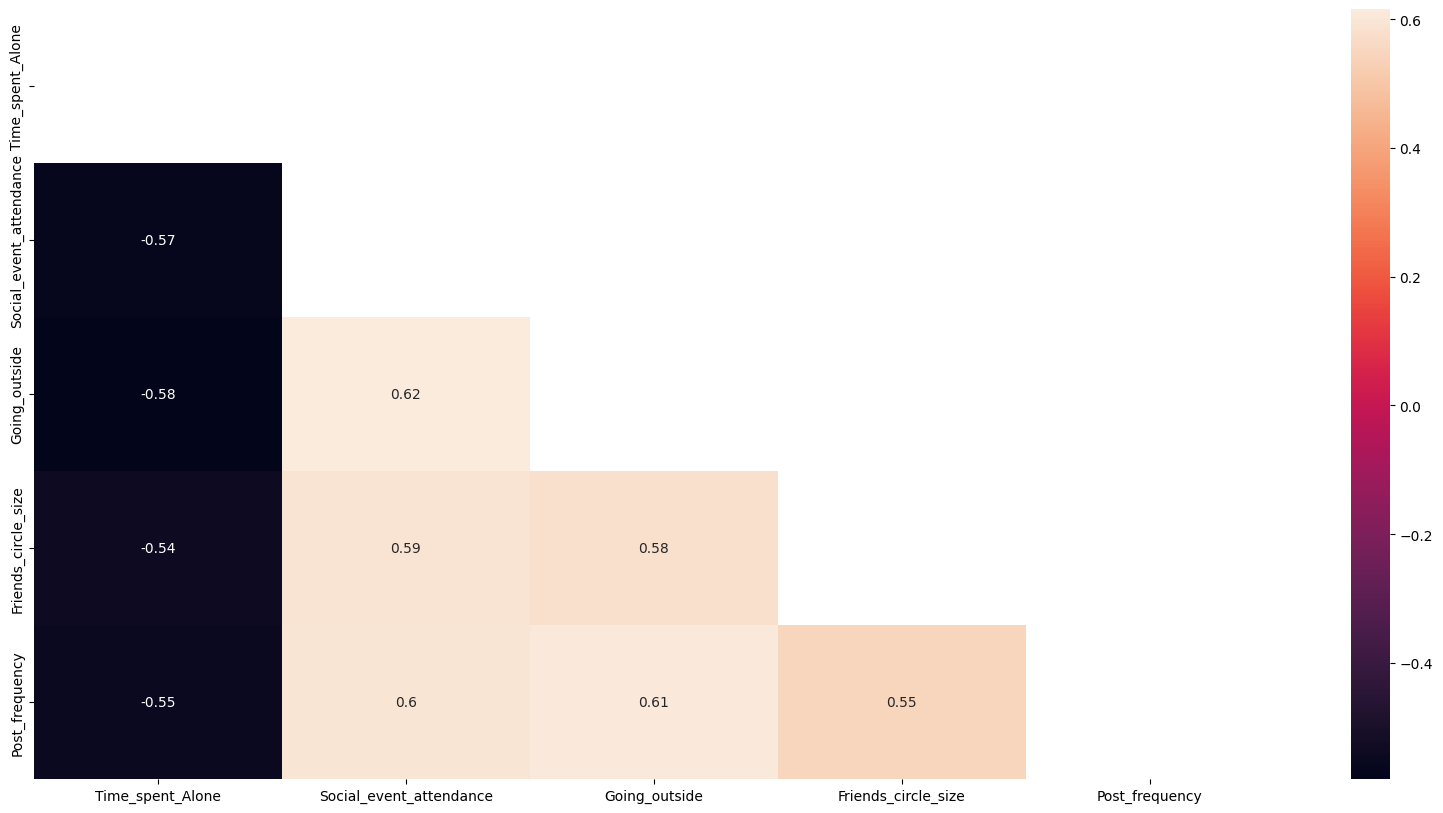

In [ ]:
sns.heatmap(df[num].corr(),annot=True,mask=np.triu(df[num].corr()))

In [ ]:
from scipy import stats
def chi(col):
  temp = pd.crosstab(df['Personality'],df[col])
  return stats.chi2_contingency(temp)


In [ ]:
chi('Stage_fear')

Chi2ContingencyResult(statistic=np.float64(12358.801286827766), pvalue=np.float64(0.0), dof=1, expected_freq=array([[10724.62200389,  2974.37799611],
       [ 3777.37799611,  1047.62200389]]))

shows association

In [ ]:
chi('Drained_after_socializing')

Chi2ContingencyResult(statistic=np.float64(12537.538322738013), pvalue=np.float64(0.0), dof=1, expected_freq=array([[10695.04091989,  3003.95908011],
       [ 3766.95908011,  1058.04091989]]))

also shows significance

In [ ]:
def t_fn(col):
  uniq = df['Personality'].unique()
  temp=[]
  for i in uniq:
    temp.append(df[df['Personality']==i][col])
  res=stats.ttest_ind(*temp)
  # print(res)
  if res[1] >0:
    print(f'Failed to reject:{col} is not significant for Personality')
  else:
    print(f'Reject:{col} is significant for Personality')

In [ ]:
for i in num:
  t_fn(i)

Reject:Time_spent_Alone is significant for Personality
Reject:Social_event_attendance is significant for Personality
Reject:Going_outside is significant for Personality
Reject:Friends_circle_size is significant for Personality
Reject:Post_frequency is significant for Personality


**All cols show significance. Treated Timespentalone with log1p**

# Encoding

In [ ]:
df['Stage_fear'] = df['Stage_fear'].replace({'No':0,'Yes':1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'No':0,'Yes':1})
df['Personality'] = df['Personality'].replace({'Extrovert':1,'Introvert':0})

# Multicollinearity

In [ ]:
stat(df)

(18524, 8)


,Stage_fear,Drained_after_socializing,Personality,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,0,0,1,0.000000,6.0,4.0,15.0,5.0
1,0,0,1,0.693147,7.0,3.0,10.0,8.0
2,1,0,0,1.945910,1.0,0.0,3.0,0.0
3,0,0,1,1.386294,7.0,3.0,11.0,5.0
4,0,0,1,0.693147,4.0,4.0,13.0,6.4


PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
temp=df.drop('Personality',axis=1)
pca= PCA(n_components=0.90,random_state=42)
df_pca = pca.fit_transform(temp)
df_pca=pd.DataFrame(df_pca,columns=[f'PC{i}' for i in range(1,df_pca.shape[1]+1)])
df_pca

,PC1,PC2,PC3
0,5.712679,4.201570,-0.105278
1,3.315913,-1.005026,-0.829464
2,-8.773552,2.308354,0.083104
3,2.734619,1.481898,0.961073
4,3.927630,2.866821,-2.341523
...,...,...,...
18519,2.089424,-1.028782,-0.111934
18520,-0.160820,-2.366968,0.930369
18521,-9.705605,0.327558,-0.182869
18522,-6.545305,2.482280,-1.389319


# Model building

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from random import randint

## Smote

In [ ]:
def smote(x,y):
  s = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = s.fit_resample(x, y)

  # print(f"Before SMOTE:\n{y.value_counts()}")
  print(f"After SMOTE:\n{pd.Series(y_train_resampled).value_counts()}")
  return X_train_resampled, y_train_resampled

## Logit

In [ ]:
def logit(x,y):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
  sc = StandardScaler()
  xtrain_sc = sc.fit_transform(xtrain)
  xtest_sc=sc.transform(xtest)
  xtrain_sc = pd.DataFrame(xtrain,columns=xtrain.columns)
  xtest_sc = pd.DataFrame(xtest,columns=xtest.columns)

  xtrain_sc,ytrain = smote(xtrain_sc,ytrain)

  xtrain_c = sma.add_constant(xtrain_sc)
  xtest_c = sma.add_constant(xtest)

  model = sma.Logit(ytrain,xtrain_c).fit()
  print(model.summary())
  return model

In [ ]:
x=df_pca
y=df['Personality']
logit(x,y)

After SMOTE:
Personality
1    9589
0    9589
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.211819
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Personality   No. Observations:                19178
Model:                          Logit   Df Residuals:                    19174
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Jul 2025   Pseudo R-squ.:                  0.6944
Time:                        16:10:43   Log-Likelihood:                -4062.3
converged:                       True   LL-Null:                       -13293.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3441      0.034     

## Logistic

In [ ]:
def logistic(x,y):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
  sc = StandardScaler()
  xtrain_sc = sc.fit_transform(xtrain)
  xtest_sc=sc.transform(xtest)
  xtrain_sc = pd.DataFrame(xtrain,columns=xtrain.columns)
  xtest_sc = pd.DataFrame(xtest,columns=xtest.columns)

  l=LogisticRegression(random_state=10,class_weight='balanced')
  l.fit(xtrain_sc,ytrain)
  ypred_test = l.predict(xtest_sc)
  ypred_train= l.predict(xtrain_sc)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return l

In [ ]:
x=df_pca
y=df['Personality']
logistic(x,y)

*************Train data results************
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3377
           1       0.98      0.97      0.97      9589

    accuracy                           0.96     12966
   macro avg       0.95      0.95      0.95     12966
weighted avg       0.96      0.96      0.96     12966

*************Test data results************
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1448
           1       0.98      0.96      0.97      4110

    accuracy                           0.96      5558
   macro avg       0.94      0.95      0.95      5558
weighted avg       0.96      0.96      0.96      5558



LogisticRegression(class_weight='balanced', random_state=10)

## XGboost

In [ ]:
def xg_boost(x,y):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
  sc = StandardScaler()
  xtrain_sc = sc.fit_transform(xtrain)
  xtest_sc=sc.transform(xtest)
  xtrain_sc = pd.DataFrame(xtrain_sc,columns=xtrain.columns)
  xtest_sc = pd.DataFrame(xtest_sc,columns=xtest.columns)

  xtrain_sc,ytrain = smote(xtrain_sc,ytrain)

  xgb_model = xgb.XGBClassifier(n_estimators =100,random_state=42,max_depth=4,learning_rate=0.4)
  xgb_model.fit(xtrain_sc, ytrain)

  ypred_test = xgb_model.predict(xtest_sc)
  ypred_train= xgb_model.predict(xtrain_sc)

  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))

  return xgb_model


### RandomizedSearch

In [ ]:
x=df_pca
y=df['Personality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

xtrain,ytrain = smote(xtrain,ytrain)

# Base model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define search space
param_dist = {
    'n_estimators':stats.randint(10,100),
    'max_depth': stats.randint(2,10),
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 5)
}

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,     # Try only 20 combinations
    cv=2,
    scoring='accuracy',
    # random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(xtrain, ytrain)

After SMOTE:
Personality
1    9589
0    9589
Name: count, dtype: int64
Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdda8c8cd50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdda9a05650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdda8c8f410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdda9a16910>},
                   scoring='accuracy', verbose=2)

In [ ]:
random_search

RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a23d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a18d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a33d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa2fd090>},
                   scoring='accuracy', verbose=2)

In [ ]:
random_search.best_score_

np.float64(0.9563562415267495)

In [ ]:
random_search.best_score_

np.float64(0.956251955365523)

### GridSearch

In [ ]:
x=df_pca
y=df['Personality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

param_grid = {
  'n_estimators': [60,50],
  'max_depth':[8,9,10]}
rf = RandomForestClassifier(random_state=10,class_weight='balanced')
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                        cv = 2, verbose = 2)
grid_search.fit(xtrain,ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END .......................max_depth=8, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=8, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=8, n_estimators=50; total time=   0.8s
[CV] END .......................max_depth=8, n_estimators=50; total time=   0.6s
[CV] END .......................max_depth=9, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=9, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=9, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ......................max_depth=10, n_estimators=60; total time=   1.6s
[CV] END ......................max_depth=10, n_estimators=60; total time=   1.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_es

In [ ]:
x=df_pca
y=df['Personality']
xg_boost(x,y)

After SMOTE:
Personality
1    9589
0    9589
Name: count, dtype: int64
*************Train data results************
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9589
           1       0.94      0.98      0.96      9589

    accuracy                           0.96     19178
   macro avg       0.96      0.96      0.96     19178
weighted avg       0.96      0.96      0.96     19178

*************Test data results************
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1448
           1       0.98      0.97      0.97      4110

    accuracy                           0.96      5558
   macro avg       0.95      0.96      0.95      5558
weighted avg       0.96      0.96      0.96      5558



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Random Forest

In [ ]:
def random_forest(x,y):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)
  sc = StandardScaler()
  xtrain_sc = sc.fit_transform(xtrain)
  xtest_sc=sc.transform(xtest)
  xtrain_sc = pd.DataFrame(xtrain,columns=xtrain.columns)
  xtest_sc = pd.DataFrame(xtest,columns=xtest.columns)

  # xtrain_sc,ytrain = smote(xtrain_sc,ytrain)
  rf = RandomForestClassifier(max_depth=9,n_estimators=50,random_state=10,class_weight='balanced')
  rf.fit(xtrain_sc,ytrain)
  ypred_test = rf.predict(xtest_sc)
  ypred_train= rf.predict(xtrain_sc)
  print('*************Train data results************')
  print(classification_report(ytrain,ypred_train))
  print('*************Test data results************')
  print(classification_report(ytest,ypred_test))
  return rf

### RandomizedSearch

In [ ]:
x=df_pca
y=df['Personality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

# Base model
rf = RandomForestClassifier(class_weight='balanced', random_state=10)

# Define search space
param_dist = {
    'n_estimators': [50],
    'max_depth': [9],
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 5)
}

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,     # Try only 20 combinations
    cv=2,
    scoring='accuracy',
    # random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(xtrain, ytrain)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [9],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa353a90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdda998c5d0>,
                                        'n_estimators': [50]},
                   scoring='accuracy', verbose=2)

In [ ]:
random_search

RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a23d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a18d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa3a33d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bddaa2fd090>},
                   scoring='accuracy', verbose=2)

In [ ]:
random_search.best_score_

np.float64(0.9679160882307574)

In [ ]:
random_search.best_score_

np.float64(0.9674533395033164)

### GridSearch

In [ ]:
x=df_pca
y=df['Personality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

param_grid = {
  'n_estimators': [60,50],
  'max_depth':[8,9,10]}
rf = RandomForestClassifier(random_state=10,class_weight='balanced')
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                        cv = 2, verbose = 2)
grid_search.fit(xtrain,ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END .......................max_depth=8, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=8, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=8, n_estimators=50; total time=   0.8s
[CV] END .......................max_depth=8, n_estimators=50; total time=   0.6s
[CV] END .......................max_depth=9, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=9, n_estimators=60; total time=   0.9s
[CV] END .......................max_depth=9, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=9, n_estimators=50; total time=   0.8s
[CV] END ......................max_depth=10, n_estimators=60; total time=   1.6s
[CV] END ......................max_depth=10, n_estimators=60; total time=   1.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=10, n_es

In [ ]:
x=df_pca
y=df['Personality']
model = random_forest(x,y)

*************Train data results************
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3377
           1       0.98      0.98      0.98      9589

    accuracy                           0.97     12966
   macro avg       0.96      0.96      0.96     12966
weighted avg       0.97      0.97      0.97     12966

*************Test data results************
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1448
           1       0.98      0.98      0.98      4110

    accuracy                           0.97      5558
   macro avg       0.96      0.96      0.96      5558
weighted avg       0.97      0.97      0.97      5558



# Test data

In [ ]:
samp = pd.read_csv('/root/.cache/kagglehub/competitions/playground-series-s5e7/sample_submission.csv')
samp

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert
...,...,...
6170,24694,Extrovert
6171,24695,Extrovert
6172,24696,Extrovert
6173,24697,Extrovert


In [ ]:
test = pd.read_csv('/root/.cache/kagglehub/competitions/playground-series-s5e7/test.csv')
# test.set_index('id',inplace=True)
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [ ]:
test.isnull().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [ ]:
id_list= test['id']
test.drop('id',axis=1,inplace=True)

num = test.select_dtypes(include=np.number).columns.to_list()
cat=test.select_dtypes(exclude=np.number).columns.to_list()

knn = KNNImputer(n_neighbors=5,missing_values=np.nan)
temp = pd.DataFrame(knn.fit_transform(test[num]),columns=num)
test = pd.concat([test[cat],temp],axis=1)
stat(test)


(6175, 7)


,Stage_fear,Drained_after_socializing,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,3.0,7.0,4.0,6.0,7.2
1,Yes,Yes,7.2,0.0,0.0,5.0,1.0
2,No,No,3.0,5.0,6.0,15.0,9.0
3,No,No,3.0,4.0,4.0,5.0,6.0
4,Yes,Yes,9.0,1.0,2.0,1.0,1.0


In [ ]:
test['Stage_fear']= test['Stage_fear'].fillna(test['Stage_fear'].mode()[0])
test['Drained_after_socializing']= test['Drained_after_socializing'].fillna(test['Drained_after_socializing'].mode()[0])

In [ ]:
stat(test)

(6175, 7)


,Stage_fear,Drained_after_socializing,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,3.0,7.0,4.0,6.0,7.2
1,Yes,Yes,7.2,0.0,0.0,5.0,1.0
2,No,No,3.0,5.0,6.0,15.0,9.0
3,No,No,3.0,4.0,4.0,5.0,6.0
4,Yes,Yes,9.0,1.0,2.0,1.0,1.0


In [ ]:
test.isnull().sum()

,0
Stage_fear,0
Drained_after_socializing,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0


In [ ]:
test[num].skew()

,0
Time_spent_Alone,1.173388
Social_event_attendance,-0.233475
Going_outside,-0.345084
Friends_circle_size,-0.070306
Post_frequency,-0.072784


In [ ]:
q1=temp[num].quantile(0.25)
q3=temp[num].quantile(0.75)
iqr=q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
for i in num:
  print(i)
  display(temp[(temp[i]<lw[i])|(temp[i]>uw[i])])

Time_spent_Alone


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
4,9.0,1.0,2.0,1.0,1.0
7,11.0,2.0,1.0,4.0,1.0
14,9.0,1.0,0.0,3.0,3.0
18,11.0,2.0,0.0,0.0,2.0
20,11.0,3.0,1.0,5.0,1.0
...,...,...,...,...,...
6087,11.0,2.0,0.0,3.0,3.0
6127,10.0,1.0,1.4,1.0,0.0
6144,10.0,1.0,1.0,11.0,1.0
6152,10.0,2.0,2.0,5.0,3.0


Social_event_attendance


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Going_outside


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Friends_circle_size


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


Post_frequency


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency


In [ ]:
test['Time_spent_Alone'] = np.log1p(test['Time_spent_Alone'])

In [ ]:
test[num].skew()

,0
Time_spent_Alone,-0.032340
Social_event_attendance,-0.233475
Going_outside,-0.345084
Friends_circle_size,-0.070306
Post_frequency,-0.072784


In [ ]:
stat(test)

(6175, 7)


,Stage_fear,Drained_after_socializing,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,No,No,1.386294,7.0,4.0,6.0,7.2
1,Yes,Yes,2.104134,0.0,0.0,5.0,1.0
2,No,No,1.386294,5.0,6.0,15.0,9.0
3,No,No,1.386294,4.0,4.0,5.0,6.0
4,Yes,Yes,2.302585,1.0,2.0,1.0,1.0


In [ ]:
test['Stage_fear'] = test['Stage_fear'].replace({'No':0,'Yes':1})
test['Drained_after_socializing'] = test['Drained_after_socializing'].replace({'No':0,'Yes':1})

In [ ]:
pca = PCA(n_components=0.90,random_state=42)
test_pca = pca.fit_transform(test)
test_pca = pd.DataFrame(test_pca,columns=[f'PC{i}' for i in range(1,test_pca.shape[1]+1)])
test_pca

,PC1,PC2,PC3
0,0.207627,-3.322658,-0.002540
1,-7.384359,3.537297,-1.388593
2,7.401644,1.975777,-3.185254
3,-2.285138,-2.029737,-1.368992
4,-9.390645,0.042759,-0.202223
...,...,...,...
6170,1.388689,-0.032898,-0.842529
6171,-10.418179,-0.244886,1.200054
6172,0.851200,0.240158,-2.393370
6173,3.442174,0.201685,-3.787956


In [ ]:
ypred = model.predict(test_pca)

In [ ]:
ypred = ['Extrovert' if x==1 else 'Introvert' for x in ypred]

In [ ]:
pd.DataFrame({'id':id_list,'Personality':ypred}).to_csv('/usr/submission.csv',index=False)